In [4]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from src.component.data_info import *
from src.paths import *
import pandas as pd

In [5]:
#1-load electricity data for a year
start_date = datetime(2022, 1, 1)  # Replace with your desired start date
end_date = datetime(2025, 1, 1)    


#electricity_data=load_daily_electricity_data(start_date,end_date)

In [6]:
#merge them into full data frame
full_data=load_full_data(start_date,end_date)
full_data

Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-01.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-02.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-03.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-04.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-05.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-06.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-07.json
Loading file D:\projects\electricity_demand_predictor-main\data\raw\electricity_raw_data\hourly_demand_2022-01-08.json
Loading file D:\projects\electricity_demand_pred

,date,sub_region_code,demand,temperature_2m
0,2022-01-02 00:00:00+00:00,0,1703,9.2085
1,2022-01-02 00:00:00+00:00,1,1152,9.2085
2,2022-01-02 00:00:00+00:00,2,1821,9.2085
3,2022-01-02 00:00:00+00:00,3,711,9.2085
4,2022-01-02 00:00:00+00:00,4,918,9.2085
...,...,...,...,...
301593,2025-01-01 00:00:00+00:00,6,1216,0.8085
301594,2025-01-01 00:00:00+00:00,7,344,0.8085
301595,2025-01-01 00:00:00+00:00,8,721,0.8085
301596,2025-01-01 00:00:00+00:00,9,5770,0.8085


In [7]:

full_data.to_parquet(TRANSFORMED_DATA_DIR/f'full_data.parquet',index=False)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_demand_trend(data, start_date, end_date, region_code):
    """
    Plots the demand trend for a specific region within a given date range.
    
    Parameters:
        data (pd.DataFrame): The dataframe containing the demand data.
        start_date (str): The start date for the plot in 'YYYY-MM-DD' format.
        end_date (str): The end date for the plot in 'YYYY-MM-DD' format.
        region_code (int): The sub_region_code to filter the data for plotting.
    """
    # Convert date column to datetime if it's not already
    if data['date'].dtype == object:
        data['date'] = pd.to_datetime(data['date'])
    
    # Filter data based on date range and region
    mask = (data['date'] >= start_date) & (data['date'] <= end_date) & (data['sub_region_code'] == region_code)
    filtered_data = data[mask]
    
    # Check if filtered data is empty
    if filtered_data.empty:
        print(f"No data available for Region {region_code} between {start_date} and {end_date}.")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_data, x='date', y='demand', label='sub_region_code')
    plt.title(f'Demand Trend for Region {region_code} from {start_date} to {end_date}')

    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


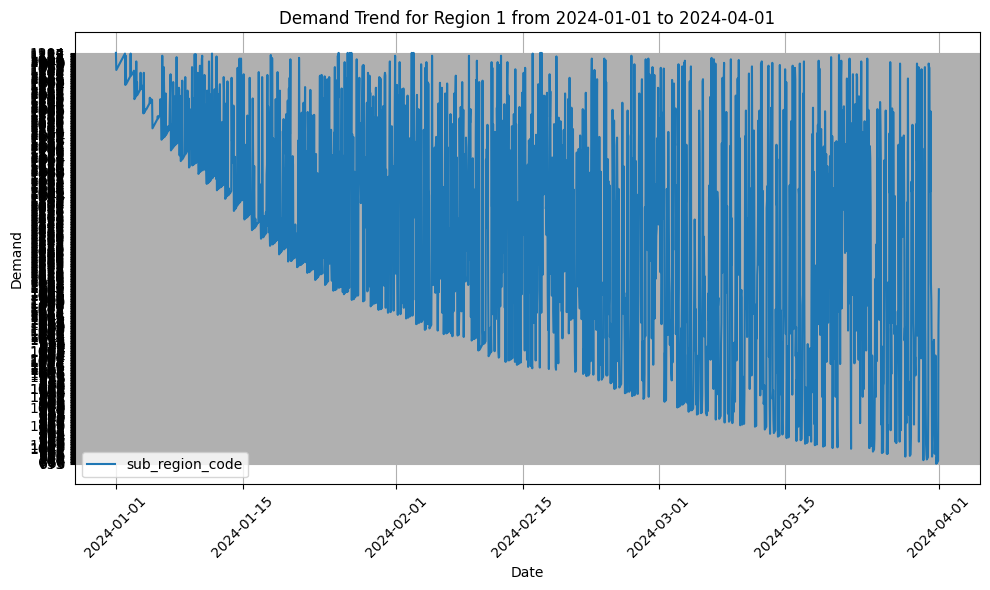

In [9]:
# Example usage
plot_demand_trend(full_data, "2024-01-01", "2024-04-01", 1)

In [10]:
import pandas as pd
full_data=pd.read_parquet('../data/transformed/full_data.parquet')
full_data

,date,sub_region_code,demand,temperature_2m
0,2022-01-02 00:00:00+00:00,0,1703,9.2085
1,2022-01-02 00:00:00+00:00,1,1152,9.2085
2,2022-01-02 00:00:00+00:00,2,1821,9.2085
3,2022-01-02 00:00:00+00:00,3,711,9.2085
4,2022-01-02 00:00:00+00:00,4,918,9.2085
...,...,...,...,...
301593,2025-01-01 00:00:00+00:00,6,1216,0.8085
301594,2025-01-01 00:00:00+00:00,7,344,0.8085
301595,2025-01-01 00:00:00+00:00,8,721,0.8085
301596,2025-01-01 00:00:00+00:00,9,5770,0.8085


In [11]:
#feature engineering on the merged data
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

def feature_engineering(data):
    data['date']= pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

    data['hour'] = data['date'].dt.hour
    data['day_of_week'] = data['date'].dt.dayofweek
    data['month'] = data['date'].dt.month
    data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)


# add (find) bank holiday (binary mask?)
    holidays = calendar().holidays(start=data['date'].min(), end=data['date'].max())
    data['is_holiday'] = data['date'].isin(holidays).astype(int)
    return data

In [12]:
full_data_with_FE=feature_engineering(full_data)

In [13]:

full_data_with_FE.to_parquet(TRANSFORMED_DATA_DIR/f'full_data_with_FE.parquet',index=False)
#full_data_with_FE

In [14]:
import pandas as pd
from src.component.data_info import *
full_data_with_FE=pd.read_parquet(('../data/transformed/full_data_with_FE.parquet'))
full_data_with_FE

,date,sub_region_code,demand,temperature_2m,hour,day_of_week,month,is_weekend,is_holiday
0,2022-01-02 00:00:00+00:00,0,1703,9.2085,0,6,1,1,0
1,2022-01-02 00:00:00+00:00,1,1152,9.2085,0,6,1,1,0
2,2022-01-02 00:00:00+00:00,2,1821,9.2085,0,6,1,1,0
3,2022-01-02 00:00:00+00:00,3,711,9.2085,0,6,1,1,0
4,2022-01-02 00:00:00+00:00,4,918,9.2085,0,6,1,1,0
...,...,...,...,...,...,...,...,...,...
301593,2025-01-01 00:00:00+00:00,6,1216,0.8085,0,2,1,0,1
301594,2025-01-01 00:00:00+00:00,7,344,0.8085,0,2,1,0,1
301595,2025-01-01 00:00:00+00:00,8,721,0.8085,0,2,1,0,1
301596,2025-01-01 00:00:00+00:00,9,5770,0.8085,0,2,1,0,1


In [15]:
full_data.columns

Index(['date', 'sub_region_code', 'demand', 'temperature_2m', 'hour',
       'day_of_week', 'month', 'is_weekend', 'is_holiday'],
      dtype='object')

In [16]:
import tqdm
features, targets = transform_ts_data_into_features_and_target(
    full_data,
    input_seq_len=24*28*1, # one month
    step_size=23,
)

print(f'{features.shape=}')
print(f'{targets.shape=}'),

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

features.shape=(12793, 675)
targets.shape=(12793,)


(None,)

In [17]:
features

,demand_previous_672_hour,demand_previous_671_hour,demand_previous_670_hour,demand_previous_669_hour,demand_previous_668_hour,demand_previous_667_hour,demand_previous_666_hour,demand_previous_665_hour,demand_previous_664_hour,demand_previous_663_hour,...,demand_previous_7_hour,demand_previous_6_hour,demand_previous_5_hour,demand_previous_4_hour,demand_previous_3_hour,demand_previous_2_hour,demand_previous_1_hour,date,sub_region_code,temperature_2m
0,1550.0,1487.0,1422.0,1373.0,1336.0,1317.0,1307.0,1315.0,1343.0,1373.0,...,1930.0,1907.0,1903.0,1933.0,1977.0,1994.0,1994.0,2022-01-28 01:00:00+00:00,0,4.6085
1,1658.0,1624.0,1571.0,1497.0,1446.0,1418.0,1406.0,1395.0,1396.0,1422.0,...,1940.0,1923.0,1920.0,1899.0,1886.0,1891.0,1942.0,2022-01-29 00:00:00+00:00,0,2.6585
2,1894.0,1868.0,1836.0,1786.0,1715.0,1637.0,1583.0,1559.0,1552.0,1559.0,...,1827.0,1822.0,1798.0,1773.0,1745.0,1732.0,1723.0,2022-01-29 22:00:00+00:00,0,6.2085
3,2003.0,2005.0,2005.0,1989.0,1991.0,1922.0,1842.0,1757.0,1702.0,1661.0,...,1649.0,1682.0,1687.0,1697.0,1690.0,1670.0,1653.0,2022-01-30 20:00:00+00:00,0,3.3085
4,1845.0,1877.0,1981.0,1971.0,1971.0,1938.0,1883.0,1832.0,1739.0,1650.0,...,1655.0,1778.0,1884.0,1904.0,1877.0,1856.0,1829.0,2022-01-31 18:00:00+00:00,0,-0.1415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12788,2016.0,2048.0,1970.0,2007.0,2143.0,2295.0,2502.0,2667.0,2666.0,2666.0,...,2083.0,1964.0,1887.0,1835.0,1825.0,1858.0,1927.0,2024-12-28 13:00:00+00:00,10,-0.9915
12789,2286.0,2169.0,2066.0,1994.0,1986.0,2034.0,2170.0,2382.0,2608.0,2758.0,...,2109.0,1966.0,1834.0,1734.0,1666.0,1621.0,1617.0,2024-12-29 11:00:00+00:00,10,-0.8415
12790,2257.0,2353.0,2330.0,2283.0,2228.0,2158.0,2061.0,2149.0,2240.0,2351.0,...,2252.0,2156.0,2030.0,1886.0,1767.0,1656.0,1599.0,2024-12-30 09:00:00+00:00,10,2.7585
12791,1953.0,2084.0,2293.0,2396.0,2313.0,2155.0,2044.0,2042.0,2123.0,2247.0,...,2476.0,2428.0,2358.0,2252.0,2115.0,1963.0,1838.0,2024-12-31 07:00:00+00:00,10,1.9585


In [18]:
tabular_data = features
tabular_data['target_demand_next_hour'] = targets

from src.paths import TRANSFORMED_DATA_DIR
tabular_data.to_parquet(TRANSFORMED_DATA_DIR / 'tabular_dataNY.parquet')